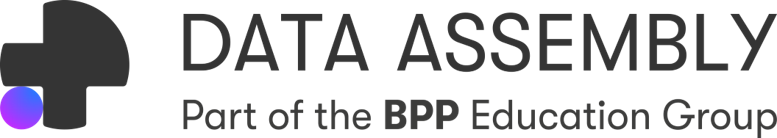

<h3><font color="#AA00BB">How you can use this Notebook</font></h3>
<p>This Notebook was written to teach new concepts in data using Python.</p>
<p>You can read through the descriptions run the code (it should work!), or you may be taken through the code by one of our experts.</p>
<p>But one of the best habits to acquire is to re-write the code yourself.</p>
<ul><li>Experiment
<li>Break the code
<li>Build a deeper understanding of both the underlying data concepts and the code
</ul>
<p>Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to write more code.</p>
<p>Enjoy!</p>
<p> - <i><font color="#AA00BB">Data Assembly team.</font></i></p>
<br>

> ❓🤔 = a question for us discuss

> ⌨️ = a task for you to try

> 🔑 = an authoritative reference or guide you may find useful

> 🚀 = **optional** material to develop yourself further


<a name="contents"></a>
## Contents

<br>1. [Data hygiene checks](#section_1)
<br>2. [Training and test data](#section_2)
<br>3. [Speed up your EDA!](#section_3)
<br>4. [Checking for missing and zero values](#section_4)
<br>5. [Visualise distribution of numeric values](#section_5)
<br>6. [Visualise distribution of categorical values](#section_6)
<br>7. [Visualise date variables](#section_7)
<br>8. [Relationships between variables](#section_8)
<br>9. [🚀 Going further - Imputing Missing Values](#section_9)
<br>10. [🚀 Going further - Dealing with outliers](#section_10)

<h2><font color="#AA00BB">Exploratory Data Analysis</font></h2>


Exploratory Data Analysis (EDA) is all about constantly asking questions about the data, based on what we are seeing. This involves examining the data, looking for patterns or relationships, and trying to identify any potential shortcomings or areas of improvement.

By exploring the data and asking questions, we can gain insights and make informed decisions about the data.

EDA is also an essential part of any supervised learning project that lead to the development of a predictive model. It is used to gain a better understanding of the data set, identify potential relationships between variables, and determine if any hypothesis can be tested.

The purpose of EDA is to uncover hidden patterns in the data that can be used to develop a predictive model. During the EDA stage, the data is explored using various techniques such as data visualisation, statistical analysis, and univariate/bivariate analysis (i.e. one variable at at time, or in relationship to another).

For example, based on the results of EDA, we might find that certain variables are strongly correlated with the target variable, or that certain variables are not useful for the model. We can also use EDA to identify potential issues with the data, such as missing values or outliers.

EDA is usually carried out in both the *data understanding* and *data preparation* phases of the Data Analysis Lifecycle shown below. In this notebook we will be using EDA primarily for *data understanding*, while in most of the following webinars, you will see use it for *data preparation* too.


![crispdm](https://www.ibm.com/docs/en/SS3RA7_sub/modeler_crispdm_ddita/clementine/images/crisp_process.jpg)

*Image from https://www.ibm.com/docs/en/spss-modeler/saas?topic=dm-crisp-help-overview*

### Predicting store revenue to inform location planning for a clothing retailer


In this lesson, we will explore a dataset with store location information for a fictional clothing retailer.

The ultimate aim is to build a model to predict which locations will achieve the greatest sales revenue. Then the retailer can prioritise investment in real estate which will deliver the most value.

However, before building the model we will want to understand more about the data. In the process we can check the overall data quality, and start testing hypotheses for which features of a new store location are most predictive of revenue.

---

<a name="section_1"></a>
## 1. Data hygiene checks

[Return to contents](#contents)

Data hygiene checks should come at the start of any data exploration in order to ensure that the data is clean and accurate.

These checks can include verifying the data types for each column, checking for missing or incorrect values, and ensuring that values are within the expected range.

In addition, we should also look for potential outliers and duplicate records. By performing these checks, we can make sure that the data is accurate and fit for analysis.

In [9]:
# import pandas library
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format # round decimals in pandas dataframe displays
print(pd.__version__)

# read in the csv files
df = pd.read_csv('primara existing store locations.csv', parse_dates=['opening_date_first'], infer_datetime_format=True)

# print a preview of the dataframe
df.head()

2.2.2


<ipython-input-9-c68b98ebc20d>:7: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('primara existing store locations.csv', parse_dates=['opening_date_first'], infer_datetime_format=True)
<ipython-input-9-c68b98ebc20d>:7: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('primara existing store locations.csv', parse_dates=['opening_date_first'], infer_datetime_format=True)


,store_no,year,revenue,store_size,location_type,opening_date_first,population_within_5km,train_stations_within_500m,public_transport_stop_within_50m,public_transport_stop_within_100m,bank_atm_within_5km,atm_within_5km,shop_within_5km,supermarkets_within_5km,rest_cafe_pub_within_5km,parking_spaces_within_5km,bank_atm_within_500m,atm_within_500m,proportion_5th_income_quintile,monthly_rent_per_sqm
0,1427,2016,3029034,584.00,Pedestrian zone,1998-10-22,77175,1,0,0,37,18,343,34,199,494,17,10,0.13,12.64
1,13,2016,263245,232.00,Main shopping street,1972-09-16,14304,0,0,0,16,9,184,8,110,139,7,3,0.17,NaN
2,42,2016,422011,325.00,Main shopping street,1975-11-12,11390,0,0,0,5,0,63,8,48,84,1,0,0.18,NaN
3,43,2016,364335,381.00,Outskirts / residential,1975-11-26,89679,2,0,6,21,6,356,18,131,216,10,2,0.24,NaN
4,51,2016,234535,146.00,Specialist retail center,1976-05-07,22024,1,0,1,8,0,62,7,40,92,2,0,0.26,NaN


In [10]:
# print information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   store_no                           1235 non-null   int64         
 1   year                               1235 non-null   int64         
 2   revenue                            1235 non-null   int64         
 3   store_size                         1235 non-null   float64       
 4   location_type                      1235 non-null   object        
 5   opening_date_first                 1235 non-null   datetime64[ns]
 6   population_within_5km              1235 non-null   int64         
 7   train_stations_within_500m         1235 non-null   int64         
 8   public_transport_stop_within_50m   1235 non-null   int64         
 9   public_transport_stop_within_100m  1235 non-null   int64         
 10  bank_atm_within_5km                1

In [11]:
# print a summary of the numerical columns
df.describe()

,store_no,year,revenue,store_size,opening_date_first,population_within_5km,train_stations_within_500m,public_transport_stop_within_50m,public_transport_stop_within_100m,bank_atm_within_5km,atm_within_5km,shop_within_5km,supermarkets_within_5km,rest_cafe_pub_within_5km,parking_spaces_within_5km,bank_atm_within_500m,atm_within_500m,proportion_5th_income_quintile,monthly_rent_per_sqm
count,1235.00,1235.00,1235.00,1235.00,1235,1235.00,1235.00,1235.00,1235.00,1235.00,1235.00,1235.00,1235.00,1235.00,1235.00,1235.00,1235.00,1235.00,1045.00
mean,2001.76,2016.00,351984.37,315.25,2005-05-30 10:38:57.813765120,44027.10,0.73,0.30,1.01,12.43,4.32,157.51,12.49,70.37,166.65,3.37,0.77,0.20,8.32
min,13.00,2016.00,146565.00,98.00,1972-09-16 00:00:00,2146.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,4.00,0.00,0.00,0.06,1.33
25%,1499.50,2016.00,275139.00,275.00,2000-11-27 00:00:00,11092.50,0.00,0.00,0.00,4.00,0.00,40.00,5.00,20.00,55.00,2.00,0.00,0.15,6.13
50%,1989.00,2016.00,328851.00,314.00,2007-04-19 00:00:00,19590.00,0.00,0.00,0.00,7.00,2.00,82.00,8.00,35.00,96.00,3.00,0.00,0.20,7.99
75%,2409.50,2016.00,408278.50,355.00,2011-11-15 12:00:00,44233.00,1.00,0.00,2.00,13.00,4.00,155.50,13.00,64.00,186.00,4.00,1.00,0.24,10.21
max,5383.00,2016.00,3029034.00,760.00,2015-06-11 00:00:00,730219.00,21.00,9.00,16.00,335.00,266.00,3870.00,202.00,3079.00,3225.00,23.00,12.00,0.51,38.22
std,988.49,0.00,131155.22,71.93,NaN,69472.20,1.52,0.93,1.84,20.67,12.51,284.21,15.72,159.79,230.86,2.83,1.33,0.07,3.28


In [12]:
# Check for duplicate rows
sum(df.duplicated(['store_no']))

0

> ❓🤔 Just using the information from the three `pandas` methods above (`.head()`, `.info()`, `.describe()`, `.duplicated()`) what do you now know about this data that could be useful for further data analysis and insight?

---

<a name="section_2"></a>
## 2. Training and test data

[Return to contents](#contents)

Before we start exploring our data, it is best practice to create a randomly selected subset known as training data. The typical size of training data is a 70% or 80% random selection from all the rows available. The remaining 30% or 20% is called the test data. Why do we do this?

In later webinars we will explore the problem of *data leakage* in machine learning in more detail. Briefly, this is where it is important to build a predictive model on a subset of our data so that we can test its performance on data it has never seen before. In doing this, we have a better idea of how well our model will perform in future to make real predictions on unseen data.

However, when information from the smaller test dataset is also used to create a predictive model, or even (as we will shortly do) to explore the data and select predictive columns for modelling, the final model can have artificially inflated performance metrics. In other words, if we us all our data to both explore and build our model, it can appear to perform much better than it really will on new data and can disappoint our stakeholders.

To avoid data leakage we therefore carry out the most straightforward splitting of the data randomly into 80% training and 20% test

🔑 Practical discussion on data splitting: http://www.feat.engineering/data-splitting.html

🚀 In later workshops we will explore how to use more sophisticated re-sampling of the training data alone to tune a fitting model that both fits well to the training data and generalises to new data http://www.feat.engineering/resampling.html

In [13]:
# split the data into test and training datasets
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=42) # random_state is the seed used by the random number generator so that it can be reproduced

---

<a name="section_3"></a>
## 3. Speed up your EDA

[Return to contents](#contents)

Before we explore the data in detail using `seaborn` we can get a quick feel of the data overall using sweetviz. You might also consider exploring the data in fast point-and-click BI tools such as PowerBI and Tableau before using Python.

In [14]:
!pip install sweetviz

We first explore each column individually. `sweetviz` decides automatically which columns are numeric and which are categorical then plots a histogram or bar count plot respectively for each.

> 🔑 https://towardsdatascience.com/powerful-eda-exploratory-data-analysis-in-just-two-lines-of-code-using-sweetviz-6c943d32f34

In [15]:
import sweetviz as sv


However, EDA is often carried out with a target variable in mind such as time or money. In this data set we have the store `revenue` that we wanted to predict so that, 'the retailer can prioritise investment in real estate which will deliver the most value.'

> ❓🤔 Can you spot any interesting relationships between the changing values if each predictor bar and the average `revenue` (represented by the dotted line graph)? How would you explain the reasons behind the relationships you just described?

Now that we have an overall feel of the data from automatic EDA, let's go on to use more bespoke plots to understand the data in more detail.

---

<a name="section_4"></a>
## 4. Check for missing and zero values

[Return to contents](#contents)

First let's check for the proportion of missing and zero values in each numerical column then decide if that could be an issue.

This code works by using two methods of `pandas` DataFrame: `isna()` and `any()`. The `isna()` method returns a boolean DataFrame indicating if the values are missing or not. The `any()` method returns a boolean Series indicating if any value is True along the specified axis. By using `axis=1`, the `any()` method checks for at least one `True` in each row. The result is a boolean Series that can be used to filter the original DataFrame using boolean indexing. Boolean indexing is a way of selecting rows or columns based on a boolean condition or mask. In this case, the condition is to select the rows that have at least one missing value.

In [16]:
df_missing = df_train[df_train.isna().any(axis=1)] # select rows with any missing values

df_missing.head()

,store_no,year,revenue,store_size,location_type,opening_date_first,population_within_5km,train_stations_within_500m,public_transport_stop_within_50m,public_transport_stop_within_100m,bank_atm_within_5km,atm_within_5km,shop_within_5km,supermarkets_within_5km,rest_cafe_pub_within_5km,parking_spaces_within_5km,bank_atm_within_500m,atm_within_500m,proportion_5th_income_quintile,monthly_rent_per_sqm
88,997,2016,175813,130.00,Outskirts / residential,1992-11-10,94287,0,0,4,40,10,711,31,246,450,2,0,0.19,NaN
59,751,2016,309021,300.00,Main shopping street,1990-10-04,4131,0,0,0,2,0,19,3,12,13,2,0,0.25,NaN
654,2107,2016,274063,397.00,Main shopping street,2007-10-15,61088,2,0,0,12,8,94,14,34,232,5,2,0.19,NaN
39,429,2016,271648,187.00,Outskirts / residential,1987-05-25,15353,2,0,2,6,5,39,5,16,54,6,5,0.17,NaN
30,323,2016,369283,260.00,Main shopping street,1985-12-09,12088,0,2,2,10,6,84,5,31,86,7,4,0.22,NaN


In [17]:
df_missing.head(5).style.highlight_null(color='red') # highlight missing values in red


,store_no,year,revenue,store_size,location_type,opening_date_first,population_within_5km,train_stations_within_500m,public_transport_stop_within_50m,public_transport_stop_within_100m,bank_atm_within_5km,atm_within_5km,shop_within_5km,supermarkets_within_5km,rest_cafe_pub_within_5km,parking_spaces_within_5km,bank_atm_within_500m,atm_within_500m,proportion_5th_income_quintile,monthly_rent_per_sqm
88,997,2016,175813,130.000000,Outskirts / residential,1992-11-10 00:00:00,94287,0,0,4,40,10,711,31,246,450,2,0,0.189471,nan
59,751,2016,309021,300.000000,Main shopping street,1990-10-04 00:00:00,4131,0,0,0,2,0,19,3,12,13,2,0,0.250000,nan
654,2107,2016,274063,397.000000,Main shopping street,2007-10-15 00:00:00,61088,2,0,0,12,8,94,14,34,232,5,2,0.193175,nan
39,429,2016,271648,187.000000,Outskirts / residential,1987-05-25 00:00:00,15353,2,0,2,6,5,39,5,16,54,6,5,0.174511,nan
30,323,2016,369283,260.000000,Main shopping street,1985-12-09 00:00:00,12088,0,2,2,10,6,84,5,31,86,7,4,0.221463,nan


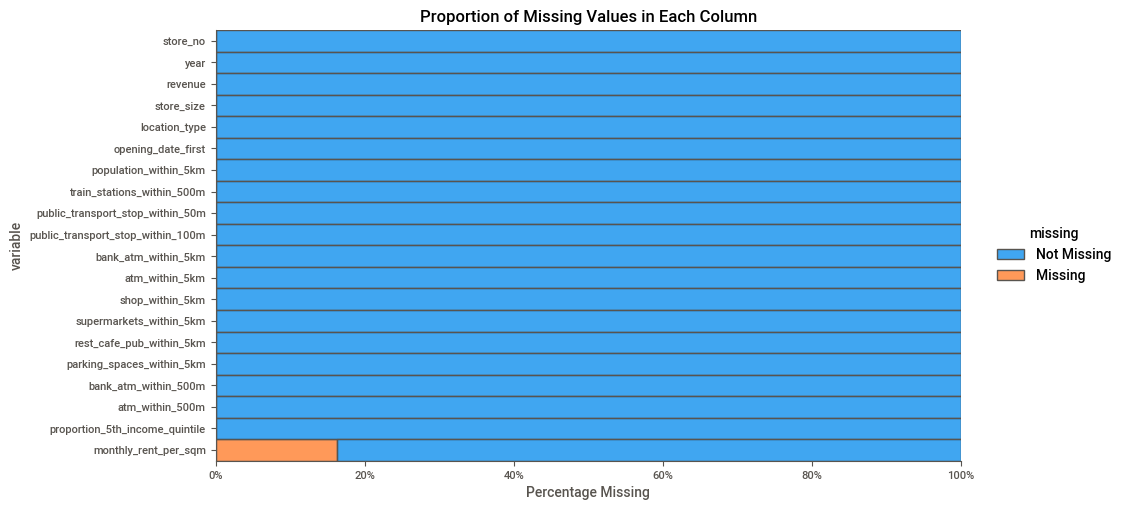

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df_train.isna().melt(value_name="missing") #melt() function enables to reshape the data from wide to long.he resulting DataFrame will have three columns: "variable", "value", and "missing".
df["missing"] = df["missing"].map({True: "Missing", False: "Not Missing"}) # replace True with 'Missing' and False with 'Not Missing'

g = sns.displot(data=df,
                y="variable",
                hue="missing",
                multiple="fill",
                aspect=2, #This argument adjusts the aspect ratio of the plot. A value of 2 indicates that the plot will have twice the width compared to its height.
                height=5)#This argument sets the height of the plot to 5 units.

g.ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
g.ax.set_xticklabels(["0%", "20%", "40%", "60%", "80%", "100%"])
g.ax.set_xlabel("Percentage Missing")

plt.title("Proportion of Missing Values in Each Column");

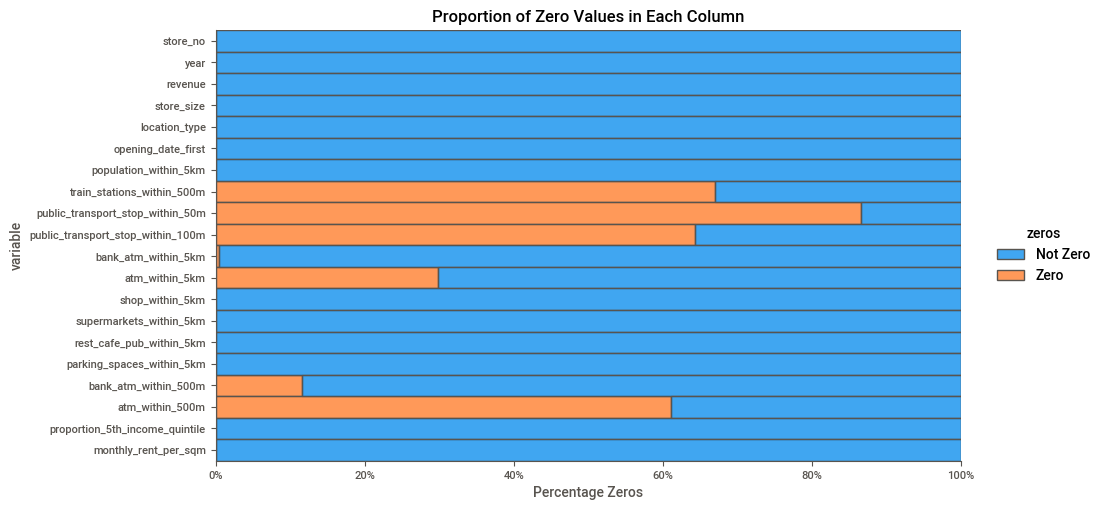

In [19]:
df = (df_train == 0).melt(value_name="zeros")#where values are ==0 put them into a column called zeros
df["zeros"] = df["zeros"].map({True: "Zero", False: "Not Zero"})

g = sns.displot(data=df,
                y="variable",
                hue="zeros",
                multiple="fill",
                aspect=2,
                height=5)

g.ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
g.ax.set_xticklabels(["0%", "20%", "40%", "60%", "80%", "100%"])
g.ax.set_xlabel("Percentage Zeros")
plt.title("Proportion of Zero Values in Each Column")
plt.show();

> ❓🤔 What do you think could explain the proportion of missing or zero values seen in each column? How might either be a problem in our future analysis?

<a name="section_5"></a>
## 5. Visualise the distribution of numeric values (and check for outliers)

[Return to contents](#contents)

The next logical step is to understand the distribution of values in each column, whether they are numeric or categorical.

For numeric data there are many different plot types. Let's explore some of the most commonly used ones, and some unusual ones you may find useful and have an impact with your stakeholders.

> 🚀 We will be using `seaborn` to explore the distribution of values in different ways. Their user guide to visualisation distributions would be a great way to level up your skills here: https://seaborn.pydata.org/tutorial/distributions.html


We start first with Box plots. They are useful for understanding the range, quartiles, and outliers in the data.

Another common plot for distributions is histograms that are useful for understanding the shape of the distribution, including the spread and skewness of the data. Note this is the choice of `sweetviz` above.

Both of these visualizations can be used to identify any potential problems with the data, such as outliers or skewed distributions, which can then be addressed.

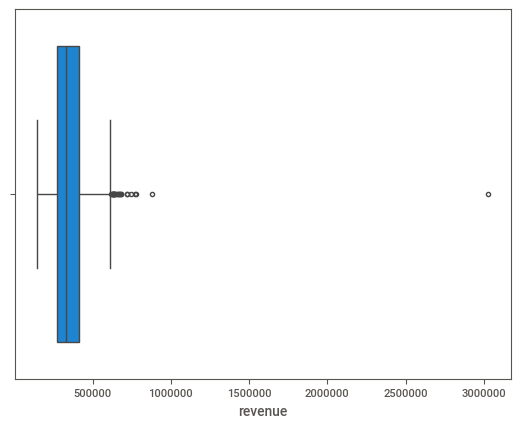

In [20]:
# Boxplot for revenue
sns.boxplot(data=df_train, x='revenue')
plt.show();

A strip plot is another useful plot type to get a more intuitive feel of the distribution of individual data points. Note how clear the outlier is on the far right of this plot.

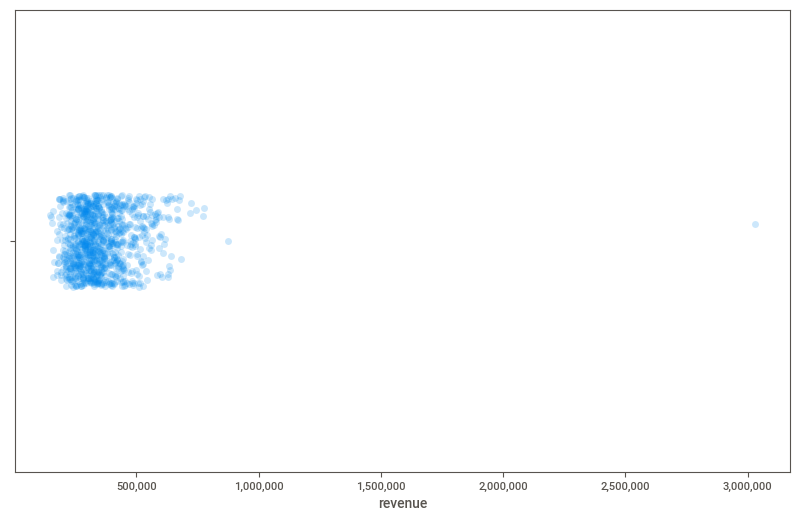

In [21]:
import matplotlib.ticker as ticker
plt.figure(figsize=(10, 6)) # set the figure size in inches
sns.stripplot(data=df_train, x='revenue', alpha=0.2);
plt.ticklabel_format(style='plain', axis='x') # remove scientific notation
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ','))) # add commas to the x-axis labels
plt.show();

We can also combine box and strip plots..

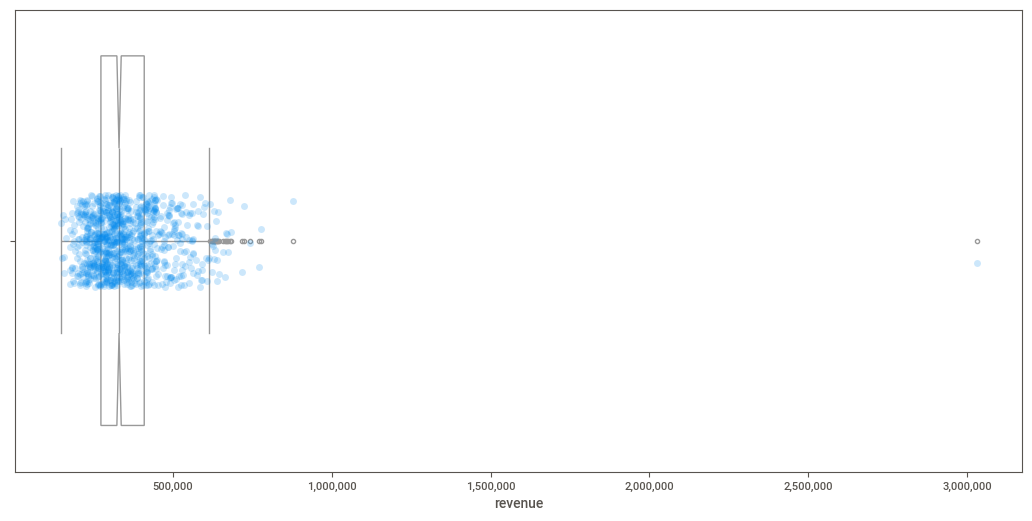

In [22]:
plt.figure(figsize=(13, 6)) # set the figure size in inches
sns.stripplot(data=df_train,x='revenue', alpha=0.2);
sns.boxplot(data=df_train,x='revenue', color='white',notch=True) # overlay a transparent box plot
plt.ticklabel_format(style='plain', axis='x') # remove scientific notation
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ','))) # add commas to the x-axis labels
plt.show();

> ⌨️ Now it's your turn to copy the code above and try out the following different `seaborn` plots: `sns.boxenplot()` `sns.swarmplot()` `sns.violinplot()` `sns.displot()`

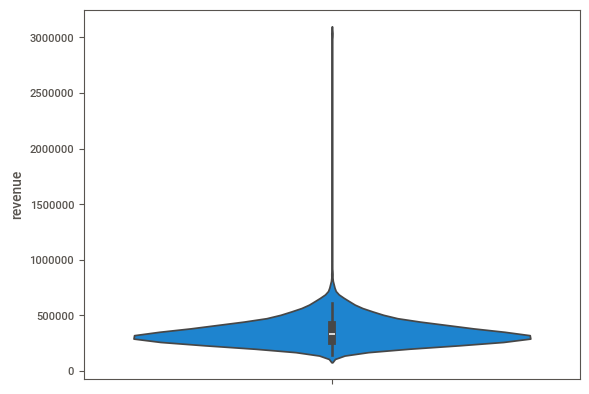

In [23]:
# Try different plot types here
sns.violinplot(data=df_train, y='revenue')
plt.show();

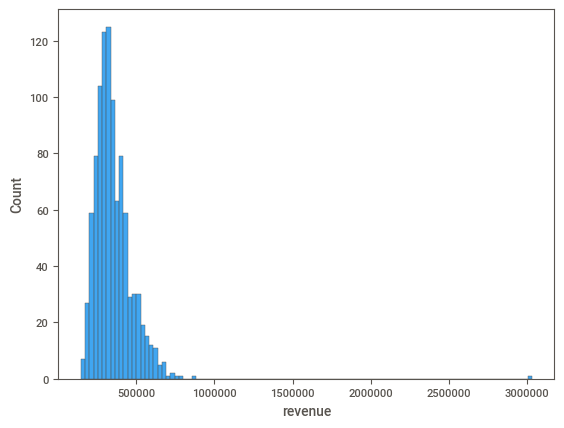

In [24]:
sns.histplot(data=df_train, x='revenue')
plt.show();

In [ ]:
sns.swarmplot(data=df_train, x='revenue')
plt.show();

In [ ]:
sns.set_theme(font_scale=1.2) # set theme for plots

plt.figure(figsize=(14, 5))
sns.scatterplot(data=df_train,
                x="revenue",
                y="store_size"
               )

plt.title("Scatter plot")
plt.show()

> ❓🤔 Which plot type(s) do you prefer and why?

> ⌨️ Once you have decided which plot type you like, use it to update the function below. Or, if you are happy with a histogram, leave the code as it is.

In [ ]:
# define a function named plotter that takes a dataframe as an argument
def plotter(df):
    # loop through the columns of the dataframe that have integer data type
    for col in df_train.select_dtypes(include=['int64']).columns:
        # create a plot for each column using seaborn library
        sns.histplot(data=df_train, x=col); # EDIT THIS LINE
        # create a new figure for each plot
        plt.figure(figsize=(10, 3)) # set the figure size in inches
        plt.show();

# call the plotter function with df_train as the input
plotter(df_train)

> 1. ❓🤔Are there any features with a skewed or bimodal distribution?

> 2. ❓🤔Are there any features with a large number of outliers?

> 🚀 What should we do if any of the answers to the above questions are "yes"? In later webinars we will look at some common steps before modelling. Here is a good guide if you wanted to explore this area early http://www.feat.engineering/engineering-numeric-predictors.html

---

<a name="section_6"></a>
## 6. Visualise the distribution of categorical values

[Return to contents](#contents)

Categorical variables can be very important for predictive modelling because they can provide valuable insights into the relationships between different variables.

However, it is important to be careful when using categorical variables. For example, if a variable is divided into too many categories, it may be difficult to accurately interpret the results.

We have one categorical variable in our data set, `location_type`. A common plot used by `sweetviz` is a bar plot that counts the occurrence of each value, let's use the same plot ourselves.

In [ ]:
# Use value_counts to get the frequency of each location type
freq = df_train['location_type'].value_counts()

# Use the index of freq as the order parameter for the countplot
sns.countplot(data=df_train, y='location_type', order=freq.index)
plt.show();

Below we follow the advice of Max Khun for visualising categorical data shown in Figure 4.14(c) and look at the relationship of the values of a categorical variable against the mean value and distribution of our target variable of interest (here it is `revenue`).

> 🔑 http://www.feat.engineering/visualizations-for-categorical-data-exploring-the-okcupid-data.html#visualizing-relationships-between-outcomes-and-predictors

In [ ]:
import seaborn as sns
import numpy as np

# calculate the mean revenue for the entire data set
mean_revenue = df_train['revenue'].mean()

# order the bars by the mean revenue for each location type
order = df_train.groupby('location_type')['revenue'].mean().sort_values().index

# create a bar plot with the updated parameters
sns.barplot(data=df_train, x='revenue', y='location_type', estimator=np.mean, errorbar=('ci', 95), capsize=.3, color='lightblue', order=order)
# remove the frame from the plot
sns.despine()

# remove the y axis line and x axis line but keep the x axis ticks
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# add a dotted line that is the mean revenue for the entire data set
plt.axvline(mean_revenue, linestyle='--', color='red')

# add a text label for the red mean line with a pound symbol
plt.text(x=mean_revenue + 5000, y=0.5, s=f'Mean revenue = £{mean_revenue:,.2f}', color='black')

plt.show();

> ❓🤔 From the plot above, describe the relationship between store location type and the average revenue. Could some differences in average values between location types be due to chance?

---

<a name="section_7"></a>
## 7. Visualise date variables

[Return to contents](#contents)

When our data includes a date or datetime column we should explore what it contains and see if the data varies by that date in interesting ways.

First, let's study the distribution of the dates in the column `opening_date_first`.

In [ ]:
import seaborn as sns
sns.displot(data=df_train, x="opening_date_first", bins=100)
plt.show();

In [ ]:
sns.lineplot(data=df_train, x='opening_date_first', y='revenue')
plt.show();

Perhaps older stores have more revene?

In [ ]:
# Find the latest date in the date column
import numpy as np
latest_date = df_train["opening_date_first"].max()

# Subtract the date column from the latest date and divide by np.timedelta64(1, 'Y') to get the number of years
df_train["store_age_years"] = (latest_date - df_train["opening_date_first"]) / np.timedelta64(1, 'Y')

sns.scatterplot(data=df_train, x='store_age_years', y='revenue')
plt.show();

<a name="section_8"></a>
## 8. Understanding relationships between variables

[Return to contents](#contents)

Understanding the relationships between variables can help us to understand the data and inform our modelling approach.

By looking at the correlations and patterns between variables, we can gain insights into the data and identify any potential shortcomings or areas of improvement.

This can help us to develop more accurate models and make better decisions when it comes to selecting a model or algorithm.

Additionally, understanding the relationships between variables can help to identify any outliers or discrepancies in the data, which can be accounted for when building the model.

In [ ]:
# This takes a long time to run for all columns so we have hand picked some columns of interest
sns.pairplot(df_train[['revenue', 'monthly_rent_per_sqm','proportion_5th_income_quintile', 'bank_atm_within_5km','store_age_years']],
             kind="reg",
             corner=False,
             height=3,
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}},
             diag_kws=dict(edgecolor="black", linewidth=0.2))
plt.show();

> ❓🤔 Questions to think about...

> 1. Are there any correlations or patterns in the data?
> 2. Are there any outliers or discrepancies in the data?
> 3. How do the variables relate to each other?
> 4. Are there any variables that have a stronger relationship than others?
> 5. Are there any variables that have a weaker relationship than others?
> 6. Can you explain the reasons or causes of the patterns you see?

---

<a name="section_9"></a>
## 9. 🚀 Going further - Imputing Missing Values

[Return to contents](#contents)

The next phase of a predictive modelling project usually involves making decisions about how to treat missing values and outliers.

Missing values must be either imputed or dropped from the dataset, depending on the data and the modelling approach.

Outliers should also be identified and treated – depending on the context, this could involve dropping them from the dataset, imputing them, or using other techniques such as capping or winsorizing.

Treating missing values and outliers is important as it can have a significant impact on the accuracy of the model.

### Options for dealing with missing values include:

1. imputing them
2. dropping them
3. using a predictive algorithm to estimate the missing values

Imputation involves replacing missing values with estimates based on the existing data, such as the mean or median value of the column.

Dropping missing values can be done by removing the entire row or column containing the missing values.

A predictive algorithm can also be used to estimate missing values, such as a regression or classification model.

Remember from earlier, only one column has missing values, `monthly_rent_per_sqm`. Below we view those rows and highlight the cell in red.

In [ ]:
df_missing = df_train[df_train.isna().any(axis=1)]

df_missing.head(15).style.highlight_null(color='red')

Below we create a new copy of the dataframe, then fill the missing values with the mean of the `monthly_rent_per_sqm`

In [ ]:
df_train_clean = df_train.copy(deep=True)

df_train_clean['monthly_rent_per_sqm'].fillna(df_train_clean['monthly_rent_per_sqm'].mean(), inplace=True)

Then we can test if that imputation step has worked. The code below should return no rows if it has worked.

In [ ]:
df_train_clean[df_train_clean.isna().any(axis=1)].style.highlight_null(color='red')

We might also simply drop rows with missing values.

In [ ]:
df_train_clean = df_train.copy(deep=True)

df_train_clean.dropna(inplace=True)

Or we could replace the missing values with zeros.

In [ ]:
df_train_clean = df_train.copy(deep=True)

df_train_clean['monthly_rent_per_sqm'].fillna(0,inplace=True)

> ❓🤔 Which strategy (or strategies) for dealing with the missing values in the column `monthly_rent_per_sqm` do you think is most appropriate for our dataset?

> 🚀 For a detailed guide to handling missing values in the context of machine learning http://www.feat.engineering/handling-missing-data.html


---

<a name="section_10"></a>
## 10. 🚀 Going further - Dealing with outliers

[Return to contents](#contents)

Outliers or extreme values may need to be given special treatment depending on the context.

Outliers can have a significant impact on the accuracy of a model, so it is important to identify and treat them appropriately.

### Options for dealing with outliers

1. dropping them
2. capping them
3. winsorising them

Dropping outliers can be done by removing the entire row or column containing the outliers.

Capping involves replacing outliers with the highest or lowest value that is within a certain range.

Winsorising involves replacing outliers with the **next** highest or lowest value that is within a certain range.

First, let's remind ourselves of one of the columns with an outlier.

In [ ]:
# revenue has a large outlier
sns.boxplot(data=df_train,x='revenue')
plt.show();

One method is to use z scores to remove values where it is more than 3 standard deviations above or below the mean.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from scipy import stats

# Calculate z-scores
z_scores = np.abs(stats.zscore(df_train['revenue'])) # note the use of abs to remove negative values
ax = sns.stripplot(data=z_scores, alpha=0.5)
ax.set_xlabel("z-score")
plt.show();

In [ ]:
# Define threshold
threshold = 3

# Filter out outliers
df_train_clean = df_train[(z_scores < threshold)]

# plot to see if the outlier is gone
sns.boxplot(data=df_train_clean,x='revenue')
plt.show();

Now that revenue has excluded an outlier, our pair plot and correlation matrix identfy clearer relationships.

In [ ]:
# This takes a long time to run for all columns so we have hand picked some columns of interest
sns.pairplot(df_train_clean[['revenue', 'monthly_rent_per_sqm','proportion_5th_income_quintile', 'bank_atm_within_5km','store_age_years']],
             kind="reg",
             corner=True,
             height=3,
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}},
             diag_kws=dict(edgecolor="black", linewidth=0.2))
plt.show();

Or use the pandas `clip` method to cap values outside a boundary to boundary values. In this case the boundaries are the 5th and 95th percentiles.

> 🔑  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.clip.html

In [ ]:
p_05 = df_train['revenue'].quantile(0.05) # 5th quantile
p_95 = df_train['revenue'].quantile(0.95) # 95th quantile

df_train_clean = df_train.copy(deep=True)

df_train_clean['revenue'].clip(p_05, p_95, inplace=True) # clip values
sns.boxplot(data=df_train_clean,x='revenue')
plt.show();

Finally, let's winsorize - it's similar to pandas clip, though the two methods may give slightly different results depending on the presence of NaN values and the input limits. You should choose the method that suits your data and your analysis best.

> 🔑 https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html

In [ ]:
from scipy.stats.mstats import winsorize

df_train_clean = df_train.copy(deep=True)

df_train_clean['revenue'] = winsorize(df_train_clean['revenue'], limits=[0.05, 0.05]) # winsorize values where the first value is the bottom % and the second value is the top %

sns.boxplot(data=df_train_clean,x='revenue')
plt.show();

> ❓🤔 Which strategy (or strategies) for dealing with extreme values do you think is most appropriate for our `revenue` and why?